In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("flight_data_2024_Full.csv", low_memory=False)

In [3]:
df.head()

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,1,1,1,2024-01-01,9E,4814.0,JFK,"New York, NY",New York,...,0,136.0,122.0,84.0,509.0,0,0,0,0,0
1,2024,1,1,1,2024-01-01,9E,4815.0,MSP,"Minneapolis, MN",Minnesota,...,0,130.0,114.0,88.0,622.0,0,0,0,0,0
2,2024,1,1,1,2024-01-01,9E,4817.0,JFK,"New York, NY",New York,...,0,106.0,90.0,61.0,288.0,0,0,0,0,0
3,2024,1,1,1,2024-01-01,9E,4817.0,RIC,"Richmond, VA",Virginia,...,0,111.0,76.0,51.0,288.0,0,0,0,0,0
4,2024,1,1,1,2024-01-01,9E,4818.0,DTW,"Detroit, MI",Michigan,...,0,79.0,70.0,45.0,237.0,0,0,0,0,0


In [4]:
df.shape

(7079081, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay            float64
 23  cancelled            int64  
 24

### Data Cleaning

In [6]:
df.isna().sum()

year                         0
month                        0
day_of_month                 0
day_of_week                  0
fl_date                      0
op_unique_carrier            0
op_carrier_fl_num            1
origin                       0
origin_city_name             0
origin_state_nm              0
dest                         0
dest_city_name               0
dest_state_nm                0
crs_dep_time                 0
dep_time                 92659
dep_delay                92970
taxi_out                 95734
wheels_off               95734
wheels_on                97856
taxi_in                  97856
crs_arr_time                 0
arr_time                 97854
arr_delay               113814
cancelled                    0
cancellation_code      6982766
diverted                     0
crs_elapsed_time             1
actual_elapsed_time     113814
air_time                113814
distance                     0
carrier_delay                0
weather_delay                0
nas_dela

In [7]:
df = df[df["cancelled"] == 0].copy()

In [8]:
df["delayed"] = (df["arr_delay"] > 15).astype(int)

In [9]:
drop_cols = [
    "arr_delay",
    "dep_delay",
    "taxi_out",
    "taxi_in",
    "air_time",
    "actual_elapsed_time",
    "carrier_delay",
    "weather_delay",
    "nas_delay",
    "security_delay",
    "late_aircraft_delay",
    "cancellation_code"
]

df = df.drop(columns=drop_cols, errors="ignore")


In [10]:
df.isna().sum()

year                    0
month                   0
day_of_month            0
day_of_week             0
fl_date                 0
op_unique_carrier       0
op_carrier_fl_num       1
origin                  0
origin_city_name        0
origin_state_nm         0
dest                    0
dest_city_name          0
dest_state_nm           0
crs_dep_time            0
dep_time                0
wheels_off              0
wheels_on            1541
crs_arr_time            0
arr_time             1539
cancelled               0
diverted                0
crs_elapsed_time        0
distance                0
delayed                 0
dtype: int64

In [11]:
num_cols = ['op_carrier_fl_num', 'wheels_on', 'arr_time']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [12]:
df.isna().sum()

year                 0
month                0
day_of_month         0
day_of_week          0
fl_date              0
op_unique_carrier    0
op_carrier_fl_num    0
origin               0
origin_city_name     0
origin_state_nm      0
dest                 0
dest_city_name       0
dest_state_nm        0
crs_dep_time         0
dep_time             0
wheels_off           0
wheels_on            0
crs_arr_time         0
arr_time             0
cancelled            0
diverted             0
crs_elapsed_time     0
distance             0
delayed              0
dtype: int64

In [13]:
df = df.drop_duplicates()

In [14]:
df["crs_dep_hour"] = df["crs_dep_time"] // 100
df = df[(df["crs_dep_hour"] >= 0) & (df["crs_dep_hour"] <= 23)]

In [15]:
df['crs_dep_hour'].unique()

array([12, 10, 14, 16,  9, 11,  8, 13,  6,  5, 17, 15, 18,  7, 20, 21, 19,
       22, 23,  0,  1,  2,  3,  4], dtype=int64)

### EDA 

In [16]:
import matplotlib.pyplot as plt

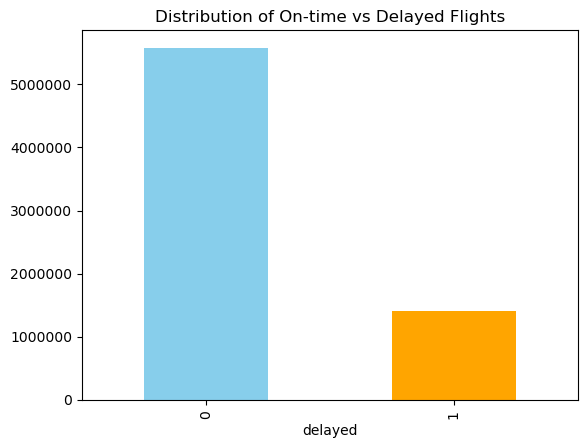

In [17]:
df['delayed'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])

plt.ticklabel_format(style='plain', axis='y')
plt.title("Distribution of On-time vs Delayed Flights")
plt.show()

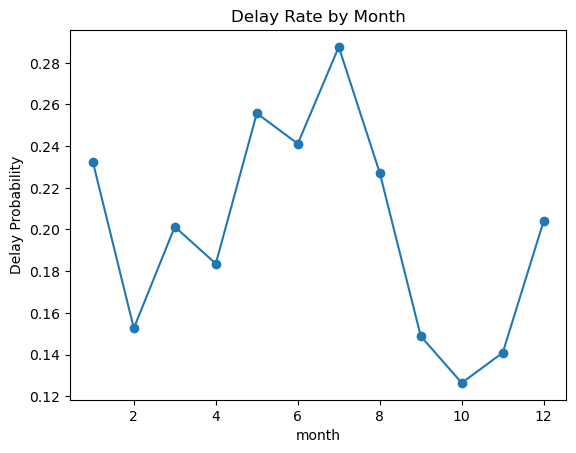

In [18]:
df.groupby("month")["delayed"].mean().plot(marker='o')
plt.title("Delay Rate by Month")
plt.ylabel("Delay Probability")
plt.show()

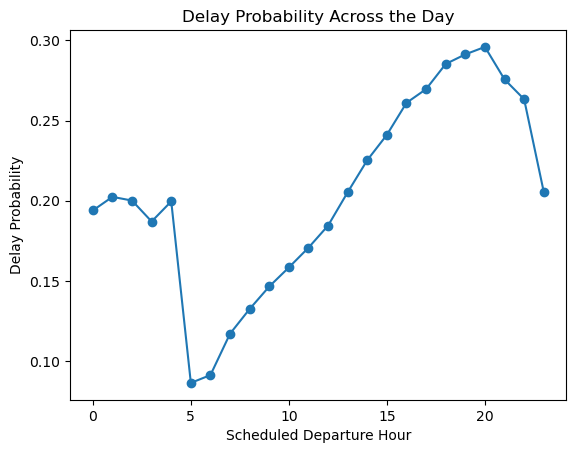

In [19]:
df.groupby("crs_dep_hour")["delayed"].mean().plot(marker="o")
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Delay Probability")
plt.title("Delay Probability Across the Day")
plt.show()

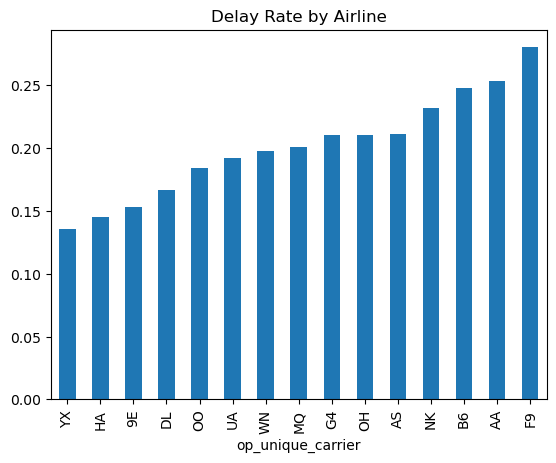

In [20]:
df.groupby("op_unique_carrier")["delayed"].mean().sort_values().plot(kind="bar")
plt.title("Delay Rate by Airline")
plt.show()

In [21]:
import seaborn as sns

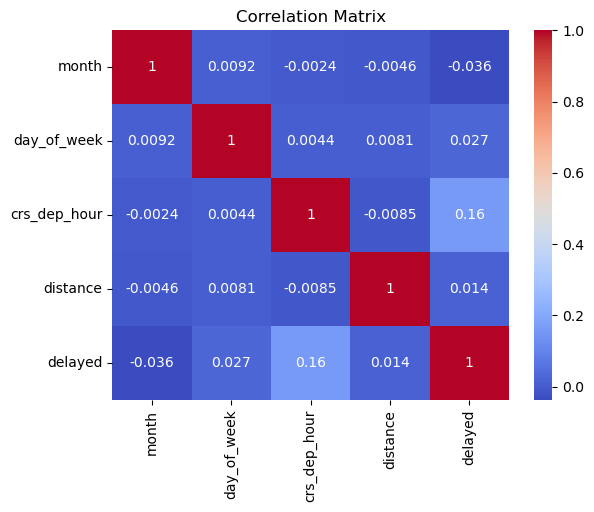

In [22]:
numeric_cols = ["month", "day_of_week", "crs_dep_hour", "distance", "delayed"]

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### Model

In [23]:
df_small = (
    df.groupby("delayed", group_keys=False)
      .sample(n=100_000, replace=False, random_state=42)
      .reset_index(drop=True)
)

df = df_small

In [24]:
features = [
    "month",
    "day_of_week",
    "crs_dep_hour",
    "distance",
    "op_unique_carrier",
    "origin",
    "dest"
]

X = df[features]
y = df["delayed"]


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [26]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

cat_cols = ["op_unique_carrier", "origin", "dest"]
num_cols = ["month", "day_of_week", "crs_dep_hour", "distance"]

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver="saga",
    max_iter=5000,
    class_weight="balanced",
)


In [ ]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", model)
])

pipe.fit(X_train, y_train)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report , confusion_matrix

y_pred = pipe.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-score:", f1)

print(classification_report(y_test, y_pred))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["On-time", "Delayed"],
    yticklabels=["On-time", "Delayed"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Flight Delay Prediction")
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump(pipe, "flight_delay_model_full.joblib")

In [ ]:
# pip install gradio joblib pandas scikit-learn

import gradio as gr


# 1) Load your trained pipeline (the SAME one you trained & saved)
#    e.g. joblib.dump(pipe, "flight_delay_model.joblib")
pipe = joblib.load("flight_delay_model_full.joblib")

# 2) Feature names MUST match training
FEATURES = [
    "month",
    "day_of_week",
    "crs_dep_hour",
    "distance",
    "op_unique_carrier",
    "origin",
    "dest"
]

def predict_delay(month, day_of_week, crs_dep_time, distance, op_unique_carrier, origin, dest):
    # --- input cleaning ---
    # crs_dep_time is HHMM like 1530
    try:
        crs_dep_time = int(crs_dep_time)
    except:
        return "Invalid time. Use HHMM like 1530.", None

    crs_dep_hour = crs_dep_time // 100
    if crs_dep_hour < 0 or crs_dep_hour > 23:
        return "Invalid time. Hour must be 0–23 (HHMM).", None

    # Build 1-row DataFrame in correct column order
    X = pd.DataFrame([{
        "month": int(month),
        "day_of_week": int(day_of_week),
        "crs_dep_hour": int(crs_dep_hour),
        "distance": float(distance),
        "op_unique_carrier": str(op_unique_carrier).strip().upper(),
        "origin": str(origin).strip().upper(),
        "dest": str(dest).strip().upper(),
    }])[FEATURES]

    # Predict probability of delayed (class 1)
    prob_delayed = float(pipe.predict_proba(X)[0][1])
    pred = int(prob_delayed >= 0.5)

    label = "DELAYED ❌" if pred == 1 else "ON-TIME ✅"
    return label, prob_delayed

with gr.Blocks(title="Flight Delay Predictor") as demo:
    gr.Markdown("# ✈️ Flight Delay Prediction (On-time vs Delayed)")
    gr.Markdown("Enter **scheduled** info (pre-departure). Time format: **HHMM** (e.g., 1530).")

    with gr.Row():
        month = gr.Number(label="Month (1-12)", value=1, precision=0)
        day_of_week = gr.Number(label="Day of Week (1-7)", value=1, precision=0)
        crs_dep_time = gr.Textbox(label="Scheduled Departure Time (HHMM)", value="1530")

    with gr.Row():
        distance = gr.Number(label="Distance (miles)", value=500)
        op_unique_carrier = gr.Textbox(label="Carrier Code (e.g., AA, DL, UA)", value="AA")
        origin = gr.Textbox(label="Origin Airport (e.g., JFK)", value="JFK")
        dest = gr.Textbox(label="Destination Airport (e.g., LAX)", value="LAX")

    btn = gr.Button("Predict")

    out_label = gr.Textbox(label="Prediction")
    out_prob = gr.Number(label="Probability of Delay (0–1)")

    btn.click(
        fn=predict_delay,
        inputs=[month, day_of_week, crs_dep_time, distance, op_unique_carrier, origin, dest],
        outputs=[out_label, out_prob]
    )

demo.launch()
